In [1]:
%matplotlib inline
import numpy as np
from scipy.interpolate import LinearNDInterpolator
import ee


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
ee.Initialize()

In [ ]:
gndvi = mpimg.imread('/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Ray_Region_GNDVI_noKey.png')
swirb = mpimg.imread('/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Ray_Region_SWIRB_noKey.png')
band_vary = mpimg.imread('/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Ray_Region_BandVariation_noKey.png')

In [85]:
def makeGradient(color):
    arr = []
    if(color == "red"):
        for i in range(0, 100):
            arr.append([242/255, 9/255, 21/255, i/100])
    elif (color == "green"):
        for i in range(0, 100):
            arr.append([55/255, 145/255, 23/255, i/100])
    elif (color == "blue"):
        for i in range(0, 100):
            arr.append([67/255, 49/255, 255/255, i/100])
    return arr
    

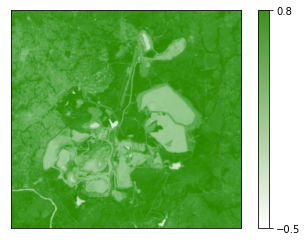

In [91]:
fig = plt.figure()
cmap = ListedColormap(makeGradient("green"))

f = plt.imshow(gndvi[:,:,:], cmap=cmap)
plt.colorbar(f,ticks=[-0.5, 0.8])
plt.clim(-0.5,0.8)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.savefig('gndvi_visualization.png')
plt.show()


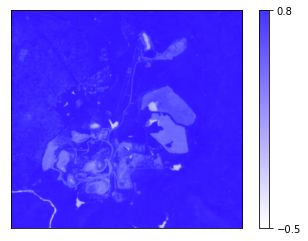

In [92]:
fig = plt.figure()

cmap = ListedColormap(makeGradient("blue"))

f = plt.imshow(swirb[:,:,:], cmap=cmap)
plt.colorbar(f,ticks=[-0.5, 0.8])
plt.clim(-0.5,0.8)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.savefig('swirb_visualization.png')
plt.show()

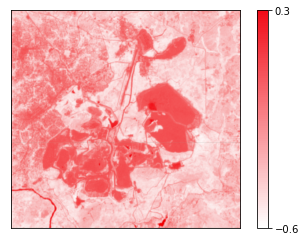

In [93]:
fig = plt.figure()

cmap = ListedColormap(makeGradient("red"))

f = plt.imshow(band_vary[:,:,:], cmap=cmap)
plt.colorbar(f,ticks=[-0.6, 0.3])
plt.clim(-0.6, 0.3)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.savefig('bandVary_visualization.png')
plt.show()

In [3]:
ex = np.genfromtxt("/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/results/compiled.csv", delimiter=',', skip_header=1, usecols=(16,17))

In [ ]:
comp_1 = np.genfromtxt("/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Regression/region_25.95_26.65_-11_-10/compiled_-10_-11.csv", delimiter=',', skip_header=1, usecols=(16,17))
comp_2 = np.genfromtxt("/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Regression/region_25.95_26.65_-11_-10/compiled_-10.2_-11.csv", delimiter=',', skip_header=1, usecols=(16,17))
comp_3 = np.genfromtxt("/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Regression/region_25.95_26.65_-11_-10/compiled_-10.5_-10.75.csv", delimiter=',', skip_header=1, usecols=(16,17))
comp_4 = np.genfromtxt("/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Regression/region_25.95_26.65_-11_-10/compiled_-10.7_-11.csv", delimiter=',', skip_header=1, usecols=(16,17))
comp_5 = np.genfromtxt("/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Regression/region_25.95_26.65_-11_-10/compiled_-10.85_-11.csv", delimiter=',', skip_header=1, usecols=(16,17))
comp_6 = np.genfromtxt("/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Regression/region_25.95_26.65_-11_-10/compiled_-10.5_-10.65.csv", delimiter=',', skip_header=1, usecols=(16,17))

In [ ]:
print("Comp 1")
plt.scatter(comp_1[::100,0], comp_1[::100,1])
plt.show()

In [ ]:
print("Comp 2")
plt.scatter(comp_2[::100,0], comp_2[::100,1])
plt.show()

In [ ]:
print("Comp 3")
plt.scatter(comp_3[::100,0], comp_3[::100,1])
plt.show()

In [ ]:
print("Comp 4")
plt.scatter(comp_4[::100,0], comp_4[::100,1])
plt.show()

In [ ]:
print("Comp 5")
plt.scatter(comp_5[::100,0], comp_5[::100,1])
plt.show()

In [ ]:
print("Comp 6")
plt.scatter(comp_6[::100,0], comp_6[::100,1])
plt.show()

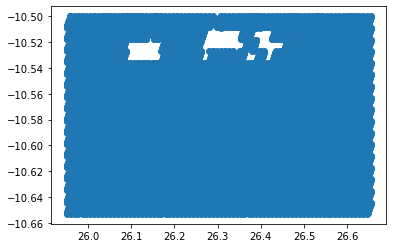

In [5]:
plt.scatter(ex[::100,0], ex[::100,1])
plt.show()

In [4]:
import os
import glob
import pandas as pd
os.chdir("/scratch/agarwal.rishi/GEE/rishiAgarwal/Jobs/final/Visualize/Regression/region_25.95_26.65_-11_-10/")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [25]:
import csv

header = None
with open('Regression/combined_csv_status.csv', 'r') as inp, open('Regression/reduced.csv', 'w') as out:
    writer = csv.writer(out)
    reader = csv.reader(inp)
    header = next(reader, None)
    writer.writerow(header)
    for row in csv.reader(inp):        
        if float(row[0]) >= 26.1324982 and float(row[1]) >= -10.5971392 and float(row[2]) <= 26.1725983 and float(row[3]) <= -10.5569179:  
            writer.writerow(row)
